In [2]:
# importing libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use ('ggplot')

from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [3]:
df = pd.read_csv('movies.csv')


In [4]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [5]:
#missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull()*100)
    print('{} - {}%'.format(col,pct_missing))


name - 0.0%
rating - 1.0041731872717787%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.22170057381324987%
runtime - 0.05216484089723526%


In [6]:
df= df.dropna()

In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull()*100)
    print('{} - {}%'.format(col,pct_missing))


name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [8]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [9]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [10]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  yearcorrect  
0                            Warner Bros.    146.0         1980  
1                       Columbia Pictures    104.0         1980  
2                               Lucasfilm    124.0         1980  
3                      Paramount Pictures     88.0         1980  
4                          Orion Pictures     98.0         1980  
...                                   ...      ...          ...  
7648                    Columbia Pictures    124.0         2020  
7649                   Paramount Pictures     99.0         2020  
7650                   Universal Pictures    101.0         2020  
7651                 20th Century Studios    100.0         2020  
7652  Beijing Diqi Yinxiang Entertainment    149.0         2020  

[5421 rows x 16 columns]

In [22]:
 df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
df.sort_values(by=['gross'], inplace = False, ascending = False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

In [58]:
df.drop_duplicates().head()

name rating   genre  \
5445                                      Avatar  PG-13  Action   
7445                           Avengers: Endgame  PG-13  Action   
3045                                     Titanic  PG-13   Drama   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action   
7244                      Avengers: Infinity War  PG-13  Action   

                               released  score       gross       director  \
5445  December 18, 2009 (United States)    7.8  2847246203  James Cameron   
7445     April 26, 2019 (United States)    8.4  2797501328  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  2201647264  James Cameron   
6663  December 18, 2015 (United States)    7.8  2069521700    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4  2048359754  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

          votes                company  runtime  yearcorrect  
5445  1100000.0  Twentieth Century Fox    162.0         2009  
7445   903000.0         Marvel Studios    181.0         2019  
3045  1100000.0  Twentieth Century Fox    194.0         1997  
6663   876000.0              Lucasfilm    138.0         2015  
7244   897000.0         Marvel Studios    149.0         2018

In [16]:
col1 = 'gross'
col2 = 'votes'

In [17]:
columns = list(df.columns)

# Find the indices of the columns to swap
index1, index2 = columns.index(col1), columns.index(col2)

# Swap the columns
columns[index1], columns[index2] = columns[index2], columns[index1]

# Reorder the DataFrame
df = df[columns]

print(df)

                                                   name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                          

In [57]:
df.head()

name rating   genre  \
5445                                      Avatar  PG-13  Action   
7445                           Avengers: Endgame  PG-13  Action   
3045                                     Titanic  PG-13   Drama   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action   
7244                      Avengers: Infinity War  PG-13  Action   

                               released  score       gross       director  \
5445  December 18, 2009 (United States)    7.8  2847246203  James Cameron   
7445     April 26, 2019 (United States)    8.4  2797501328  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  2201647264  James Cameron   
6663  December 18, 2015 (United States)    7.8  2069521700    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4  2048359754  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

          votes                company  runtime  yearcorrect  
5445  1100000.0  Twentieth Century Fox    162.0         2009  
7445   903000.0         Marvel Studios    181.0         2019  
3045  1100000.0  Twentieth Century Fox    194.0         1997  
6663   876000.0              Lucasfilm    138.0         2015  
7244   897000.0         Marvel Studios    149.0         2018

In [19]:
#budget high correlation
# company high correlation

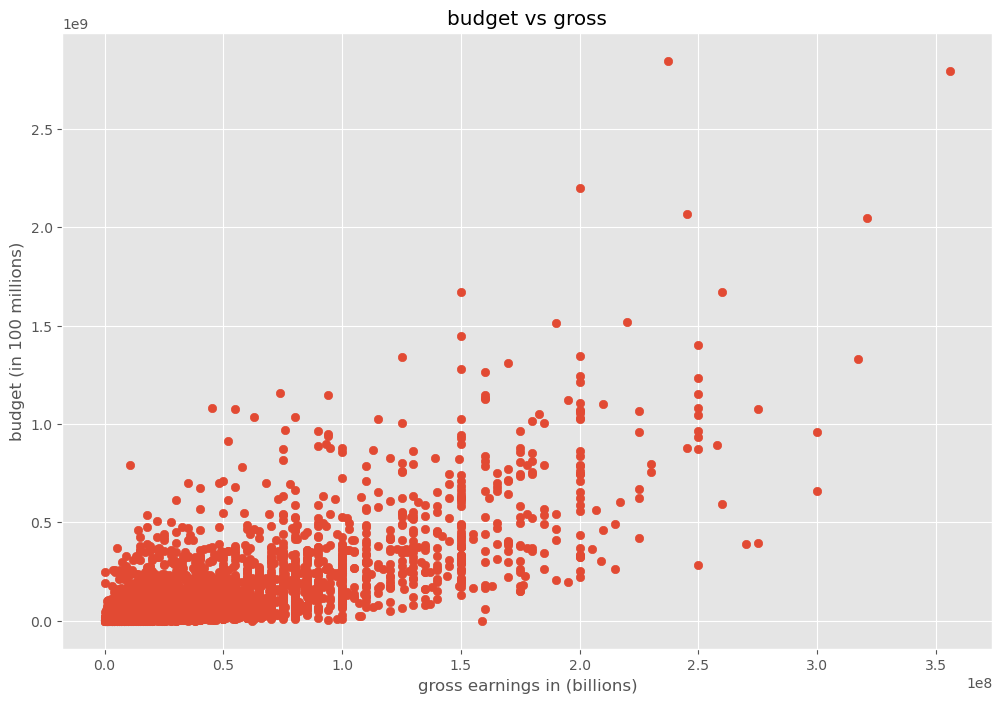

In [24]:
# scatter plot budget vs gross

plt.scatter ( x=df['budget'], y=df['gross'])

plt.title('budget vs gross')
plt.xlabel('gross earnings in (billions)')
plt.ylabel('budget (in 100 millions)')
plt.show()

In [56]:
df.head()

name rating   genre  \
5445                                      Avatar  PG-13  Action   
7445                           Avengers: Endgame  PG-13  Action   
3045                                     Titanic  PG-13   Drama   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action   
7244                      Avengers: Infinity War  PG-13  Action   

                               released  score       gross       director  \
5445  December 18, 2009 (United States)    7.8  2847246203  James Cameron   
7445     April 26, 2019 (United States)    8.4  2797501328  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  2201647264  James Cameron   
6663  December 18, 2015 (United States)    7.8  2069521700    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4  2048359754  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

          votes                company  runtime  yearcorrect  
5445  1100000.0  Twentieth Century Fox    162.0         2009  
7445   903000.0         Marvel Studios    181.0         2019  
3045  1100000.0  Twentieth Century Fox    194.0         1997  
6663   876000.0              Lucasfilm    138.0         2015  
7244   897000.0         Marvel Studios    149.0         2018

<Axes: xlabel='budget', ylabel='gross'>

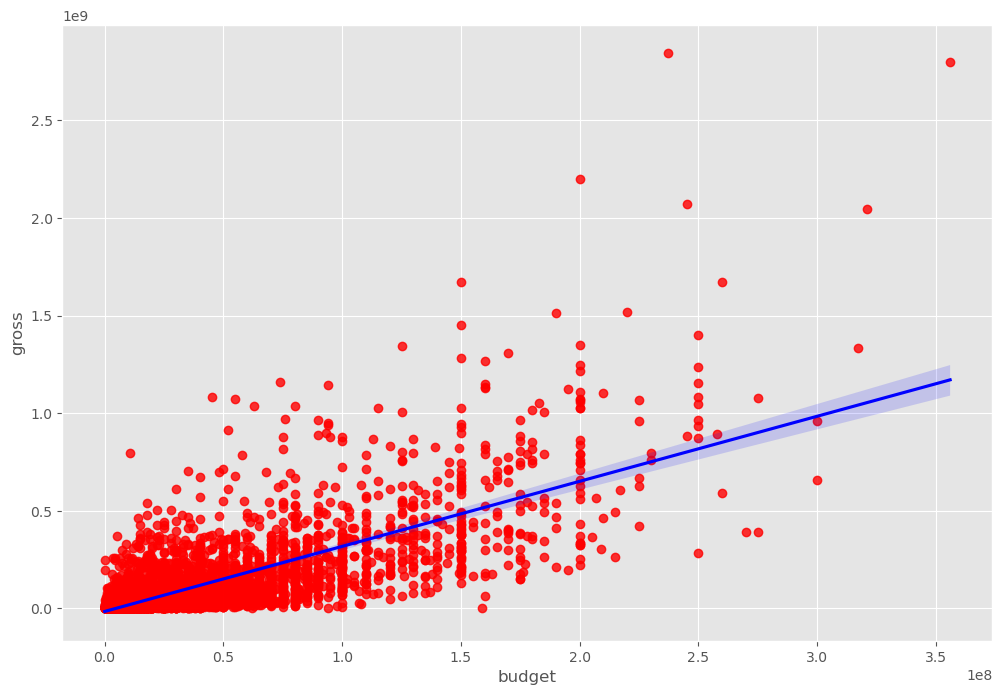

In [28]:
# plot the budget vs gross in seaborn

sns.regplot(x='budget', y='gross', data = df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [43]:
df = df.drop(columns=['year'])

In [44]:
df.dtypes

name            object
rating          object
genre           object
released        object
score          float64
gross            int64
director        object
writer          object
star            object
country         object
budget           int64
votes          float64
company         object
runtime        float64
yearcorrect      int32
dtype: object

In [45]:
numeric_df = df.select_dtypes(include=[np.number])

In [55]:
print(numeric_df).head()

      score       gross     budget      votes  runtime  yearcorrect
5445    7.8  2847246203  237000000  1100000.0    162.0         2009
7445    8.4  2797501328  356000000   903000.0    181.0         2019
3045    7.8  2201647264  200000000  1100000.0    194.0         1997
6663    7.8  2069521700  245000000   876000.0    138.0         2015
7244    8.4  2048359754  321000000   897000.0    149.0         2018
7480    6.9  1670727580  260000000   222000.0    118.0         2019
6653    7.0  1670516444  150000000   593000.0    124.0         2015
6043    8.0  1518815515  220000000  1300000.0    143.0         2012
6646    7.1  1515341399  190000000   370000.0    137.0         2015
7494    6.8  1450026933  150000000   148000.0    103.0         2019
6644    7.3  1402809540  250000000   777000.0    141.0         2015
7247    7.3  1347597973  200000000   661000.0    134.0         2018
5845    8.1  1342321665  125000000   790000.0    130.0         2011
7075    7.0  1332698830  317000000   581000.0   

AttributeError: 'NoneType' object has no attribute 'head'

In [47]:
numeric_df.corr(method = 'pearson')

score     gross    budget     votes   runtime  yearcorrect
score        1.000000  0.222556  0.072001  0.474256  0.414068     0.061923
gross        0.222556  1.000000  0.740247  0.614751  0.275796     0.268721
budget       0.072001  0.740247  1.000000  0.439675  0.318695     0.320312
votes        0.474256  0.614751  0.439675  1.000000  0.352303     0.203098
runtime      0.414068  0.275796  0.318695  0.352303  1.000000     0.075294
yearcorrect  0.061923  0.268721  0.320312  0.203098  0.075294     1.000000

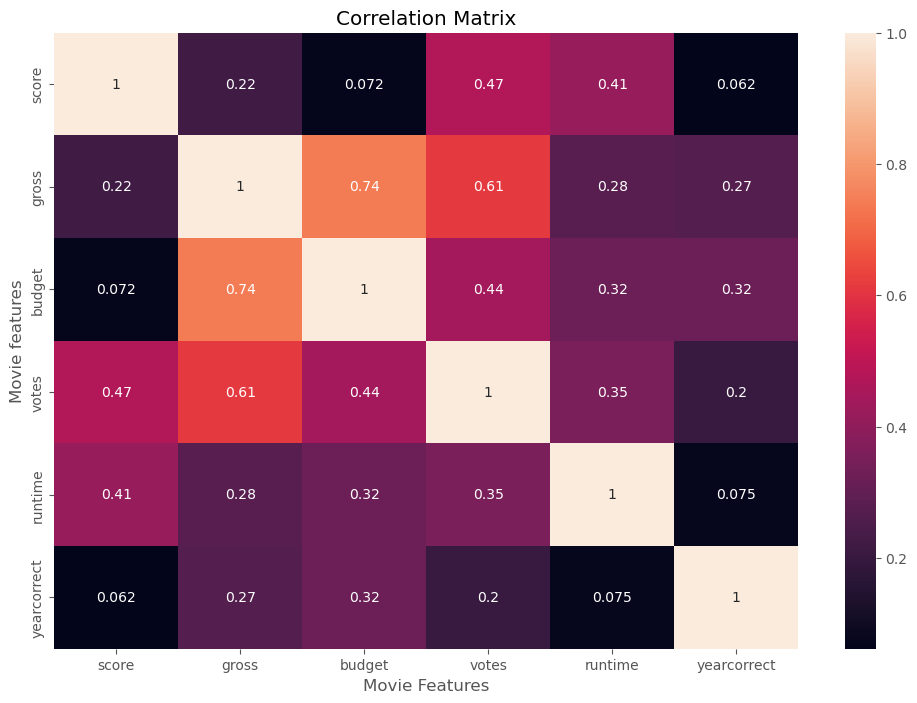

In [54]:
#high correlation between budget and gross

corr_matrix = numeric_df.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie features')

plt.show()